In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load dataset

Untuk hands-on kita akan melihat dataset sintetik prediksi kebotakan. Agar running time-nya tidak terlalu lama, kali ini kita ambil sampel 1000 baris data saja.

In [3]:
df = pd.read_csv(r"D:\rakamin_machinelearningprep\Hands-on\Food_Delivery_Dataset.csv")

# Descriptive Statistics

## Memeriksa kolom-kolom dan nilai hilang dengan `df.info()`

Hal pertama yang biasanya dilakukan dalam EDA adalah mengecek tipe data setiap kolom dan jumlah nilai yang hilang. Hal ini bisa kita lakukan dengan menggunakan `df.info()`.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45593 non-null  object 
 1   delivery_person_id           45593 non-null  object 
 2   delivery_person_age          43739 non-null  float64
 3   delivery_person_ratings      43685 non-null  float64
 4   restaurant_latitude          45593 non-null  float64
 5   restaurant_longitude         45593 non-null  float64
 6   delivery_location_latitude   45593 non-null  float64
 7   delivery_location_longitude  45593 non-null  float64
 8   order_date                   45593 non-null  object 
 9   time_orderd                  43862 non-null  object 
 10  time_order_picked            45593 non-null  object 
 11  weather_conditions           44977 non-null  object 
 12  road_traffic_density         44992 non-null  object 
 13  vehicle_conditio

## Sampling untuk memahami data dengan `df.sample()`

In [5]:
df.sample(5)

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
4397,0x7790,CHENRES15DEL01,26.0,4.6,13.026286,80.275235,13.096286,80.345235,25-03-2022,19:30,19:35,Cloudy,Jam,0,Meal,motorcycle,2.0,No,Metropolitian,39.0
11031,0x772e,BANGRES03DEL03,28.0,5.0,12.979166,77.640709,13.039166,77.700709,01-04-2022,23:30,23:40,Windy,Low,2,Drinks,scooter,0.0,NaN,Urban,10.0
12585,0x7715,MUMRES09DEL02,33.0,3.5,18.994049,72.825203,19.074049,72.905203,06-04-2022,19:10,19:15,Sunny,Jam,1,Drinks,scooter,1.0,No,Metropolitian,34.0
23970,0x703d,SURRES13DEL02,39.0,4.3,21.170096,72.789122,21.300096,72.919122,31-03-2022,23:35,23:50,Cloudy,Low,0,Snack,motorcycle,1.0,No,Metropolitian,35.0
4946,0xb203,VADRES03DEL01,32.0,4.6,22.320000,73.170000,22.360000,73.210000,13-03-2022,14:10,14:25,Fog,High,1,Meal,scooter,0.0,No,Metropolitian,39.0


In [6]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['id', 'delivery_person_id', 'weather_conditions', 'road_traffic_density', 'type_of_order', 'type_of_vehicle', 'festival', 'city']
nums = ['delivery_person_age', 'delivery_person_ratings', 'vehicle_condition', 'multiple_deliveries', 'time_taken_min']
timestamp = ['order_date', 'time_orderd', 'time_order_picked']
geoloc = ['restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude']

In [7]:
df[nums].describe()

,delivery_person_age,delivery_person_ratings,vehicle_condition,multiple_deliveries,time_taken_min
count,43739.000000,43685.000000,45593.000000,44600.000000,45593.000000
mean,29.567137,4.633780,1.023359,0.744664,26.294607
std,5.815155,0.334716,0.839065,0.572473,9.383806
min,15.000000,1.000000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,1.000000,1.000000,26.000000
75%,35.000000,4.900000,2.000000,1.000000,32.000000
max,50.000000,6.000000,3.000000,3.000000,54.000000


In [8]:
df[cats].describe()

,id,delivery_person_id,weather_conditions,road_traffic_density,type_of_order,type_of_vehicle,festival,city
count,45593,45593,44977,44992,45593,45593,45365,44393
unique,45593,1320,6,4,4,4,2,3
top,0x9b47,JAPRES11DEL02,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,7654,15477,11533,26435,44469,34093


In [9]:
df.isna().sum()

id                                0
delivery_person_id                0
delivery_person_age            1854
delivery_person_ratings        1908
restaurant_latitude               0
restaurant_longitude              0
delivery_location_latitude        0
delivery_location_longitude       0
order_date                        0
time_orderd                    1731
time_order_picked                 0
weather_conditions              616
road_traffic_density            601
vehicle_condition                 0
type_of_order                     0
type_of_vehicle                   0
multiple_deliveries             993
festival                        228
city                           1200
time_taken_min                    0
dtype: int64

In [10]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom id:
id
0x9b47    1
0x6b1a    1
0xb46     1
0x6adc    1
0x4477    1
         ..
0x58f5    1
0x23d6    1
0x5f3e    1
0xb384    1
0x1801    1
Name: count, Length: 45593, dtype: int64

Value count kolom delivery_person_id:
delivery_person_id
JAPRES11DEL02       67
PUNERES01DEL01      67
HYDRES04DEL02       66
VADRES11DEL02       66
RANCHIRES02DEL01    66
                    ..
AURGRES13DEL03       7
DEHRES18DEL03        7
KOCRES16DEL03        6
KOLRES09DEL03        6
BHPRES010DEL03       5
Name: count, Length: 1320, dtype: int64

Value count kolom weather_conditions:
weather_conditions
Fog           7654
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: count, dtype: int64

Value count kolom road_traffic_density:
road_traffic_density
Low       15477
Jam       14143
Medium    10947
High       4425
Name: count, dtype: int64

Value count kolom type_of_order:
type_of_order
Snack     11533
Meal      11458
Drinks    11322
Buffe

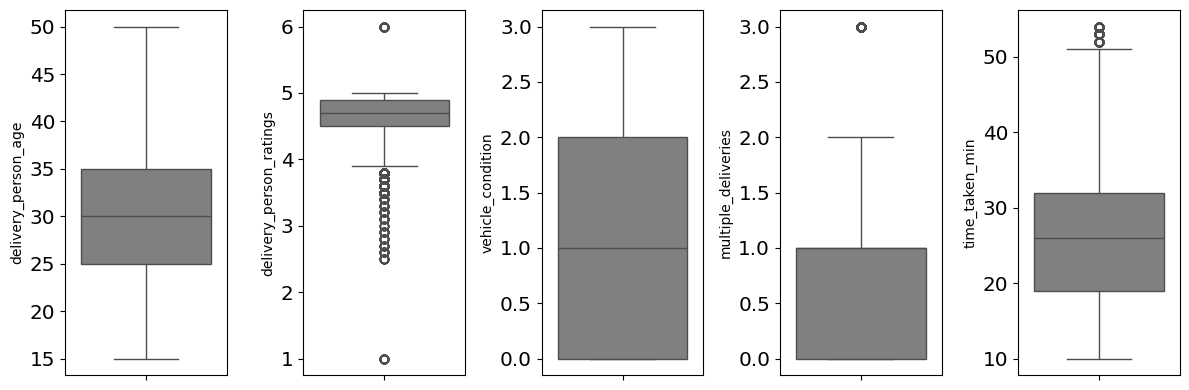

In [11]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

C:\Users\Wahgus\AppData\Local\Temp\ipykernel_15236\4275355014.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]], color='gray')
C:\Users\Wahgus\AppData\Local\Temp\ipykernel_15236\4275355014.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]], color='gray')
C:\Users\Wahgu

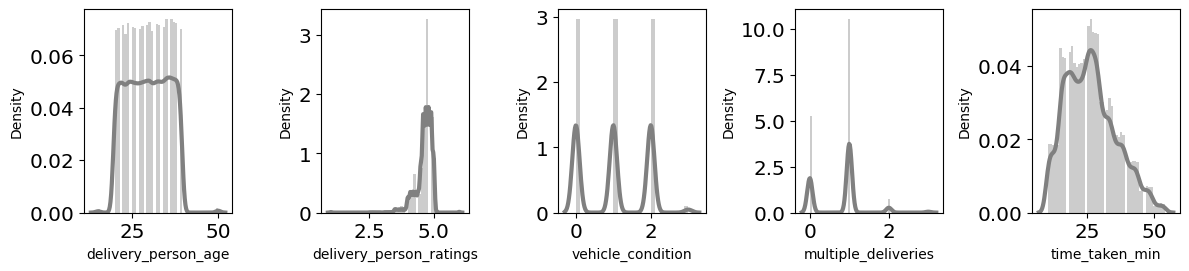

In [12]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

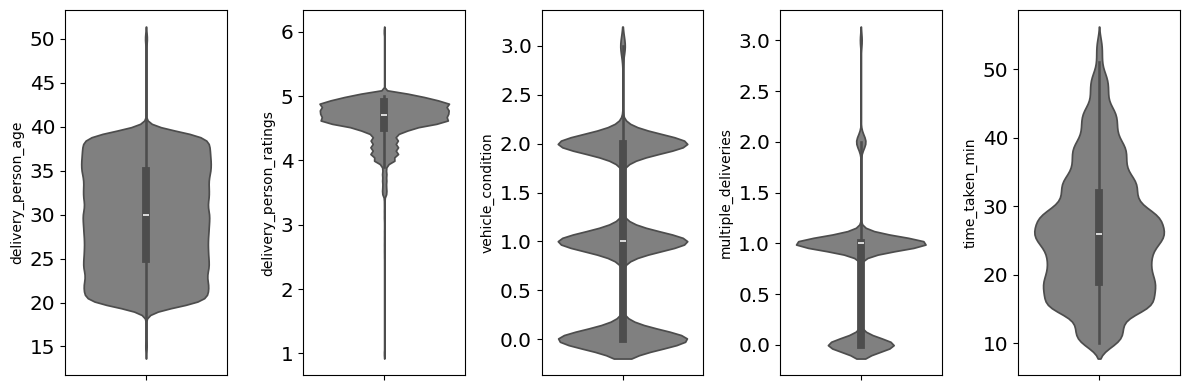

In [13]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

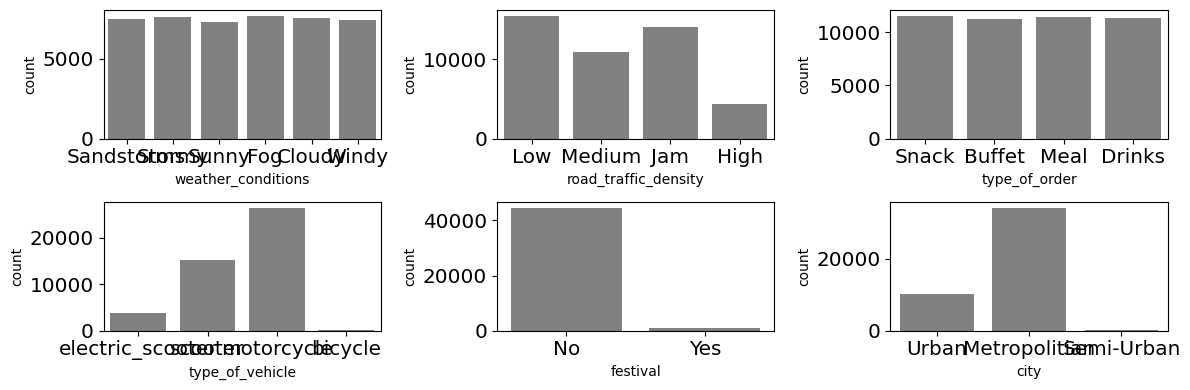

In [17]:
for i in range(0, len(cats[2:])):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=cats[2:][i], data=df, color='gray')
    plt.tight_layout()

In [19]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} -> contoh nilai:", df[col].dropna().unique()[:5])

id -> contoh nilai: ['0x6b1a' '0xb46' '0x6adc' '0x4477' '0x48ee']
delivery_person_id -> contoh nilai: ['JAPRES05DEL01' 'PUNERES20DEL02' 'BANGRES19DEL02' 'COIMBRES12DEL03'
 'JAPRES19DEL01']
order_date -> contoh nilai: ['03-04-2022' '20-03-2022' '17-03-2022' '28-03-2022' '01-04-2022']
time_orderd -> contoh nilai: ['8:15' '17:25' '21:20' '17:40' '12:45']
time_order_picked -> contoh nilai: ['8:20' '17:35' '21:25' '17:55' '12:60']
weather_conditions -> contoh nilai: ['Sandstorms' 'Stormy' 'Sunny' 'Fog' 'Cloudy']
road_traffic_density -> contoh nilai: ['Low' 'Medium' 'Jam' 'High']
type_of_order -> contoh nilai: ['Snack' 'Buffet' 'Meal' 'Drinks']
type_of_vehicle -> contoh nilai: ['electric_scooter' 'scooter' 'motorcycle' 'bicycle']
festival -> contoh nilai: ['No' 'Yes']
city -> contoh nilai: ['Urban' 'Metropolitian' 'Semi-Urban']


In [ ]:
df.corr()

In [20]:
df_numeric = df.select_dtypes(include='number')
df_numeric.corr()


,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,vehicle_condition,multiple_deliveries,time_taken_min
delivery_person_age,1.000000,-0.067939,-0.004532,-0.009347,0.002489,-0.000495,0.003308,0.115851,0.299474
delivery_person_ratings,-0.067939,1.000000,-0.007792,-0.014203,-0.010318,-0.013552,0.034581,-0.117647,-0.338790
restaurant_latitude,-0.004532,-0.007792,1.000000,0.661784,0.866378,0.602713,-0.033551,0.008051,0.013981
restaurant_longitude,-0.009347,-0.014203,0.661784,1.000000,0.632293,0.915026,-0.038744,0.004461,0.007821
delivery_location_latitude,0.002489,-0.010318,0.866378,0.632293,1.000000,0.690515,-0.001604,0.010277,0.014243
delivery_location_longitude,-0.000495,-0.013552,0.602713,0.915026,0.690515,1.000000,-0.001960,0.005023,0.007625
vehicle_condition,0.003308,0.034581,-0.033551,-0.038744,-0.001604,-0.001960,1.000000,-0.097270,-0.234398
multiple_deliveries,0.115851,-0.117647,0.008051,0.004461,0.010277,0.005023,-0.097270,1.000000,0.387051
time_taken_min,0.299474,-0.338790,0.013981,0.007821,0.014243,0.007625,-0.234398,0.387051,1.000000


<Axes: >

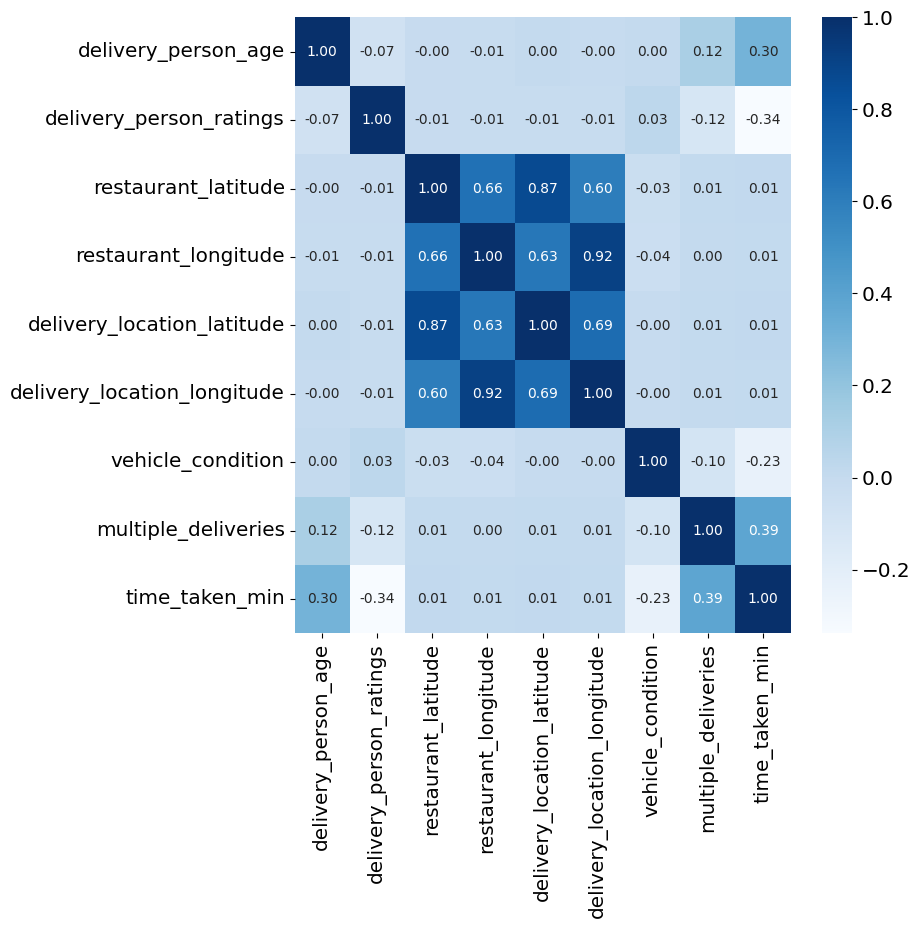

In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_numeric.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1500x1500 with 0 Axes>

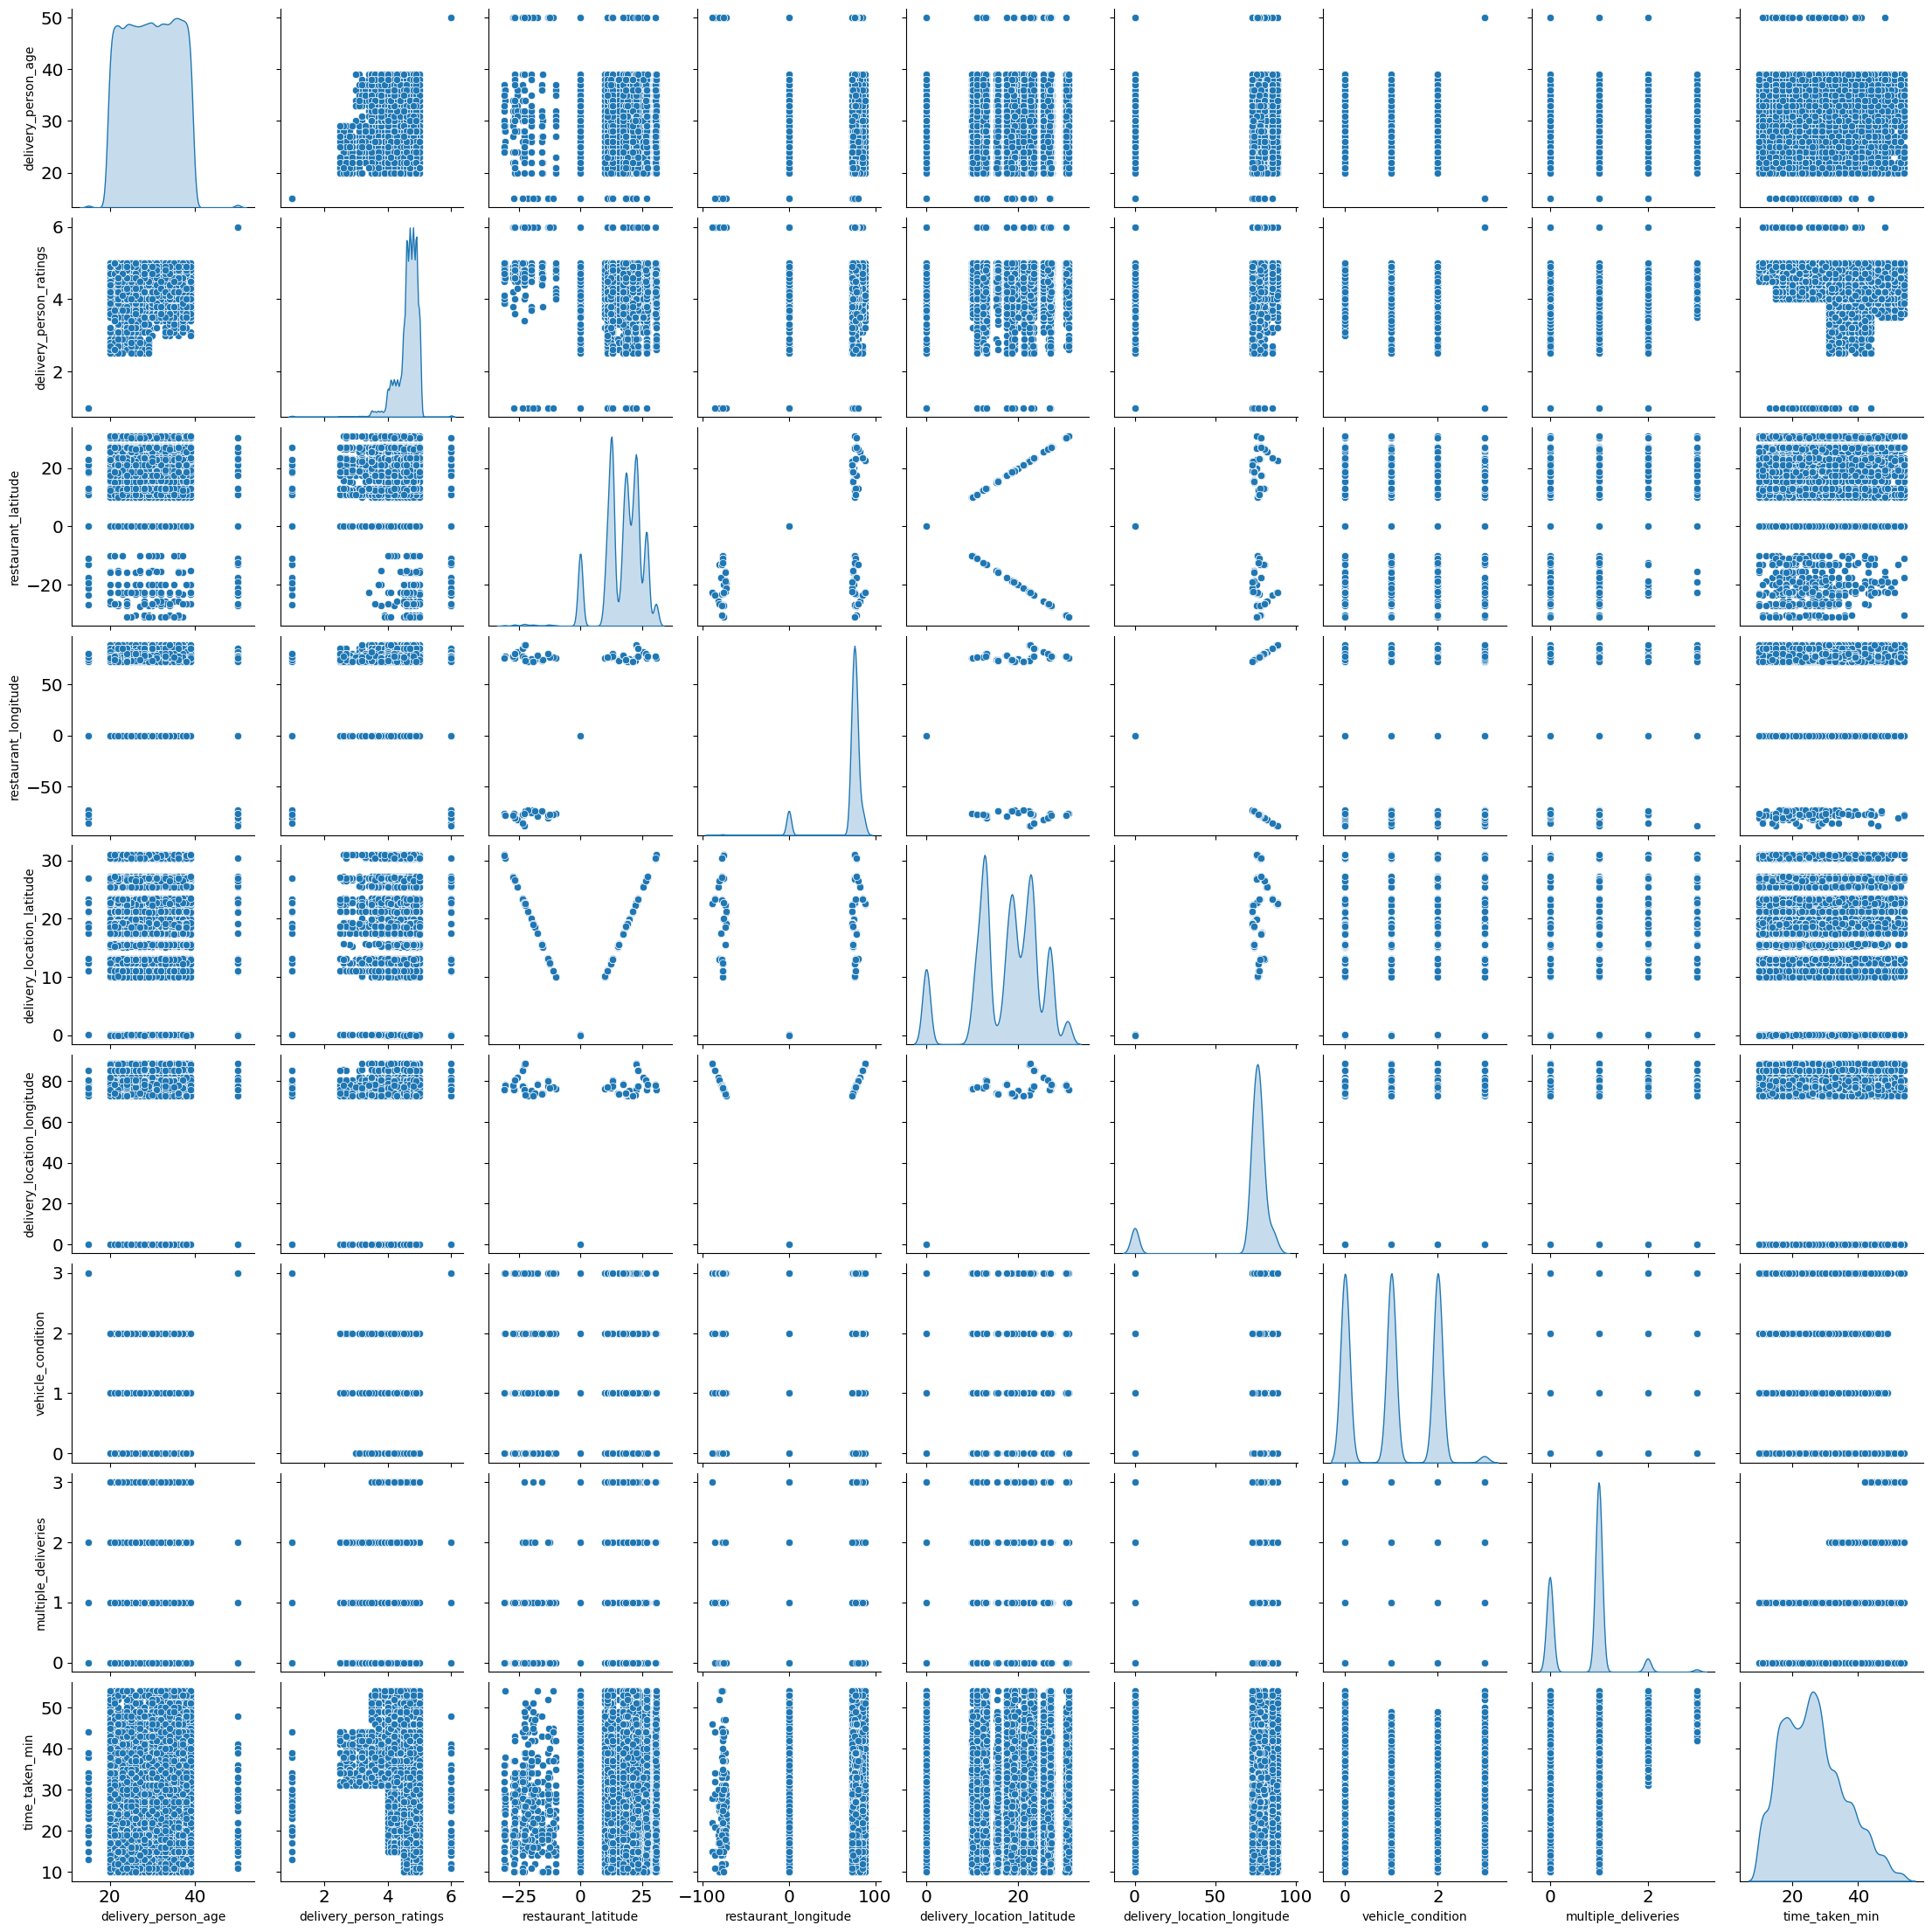

In [23]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

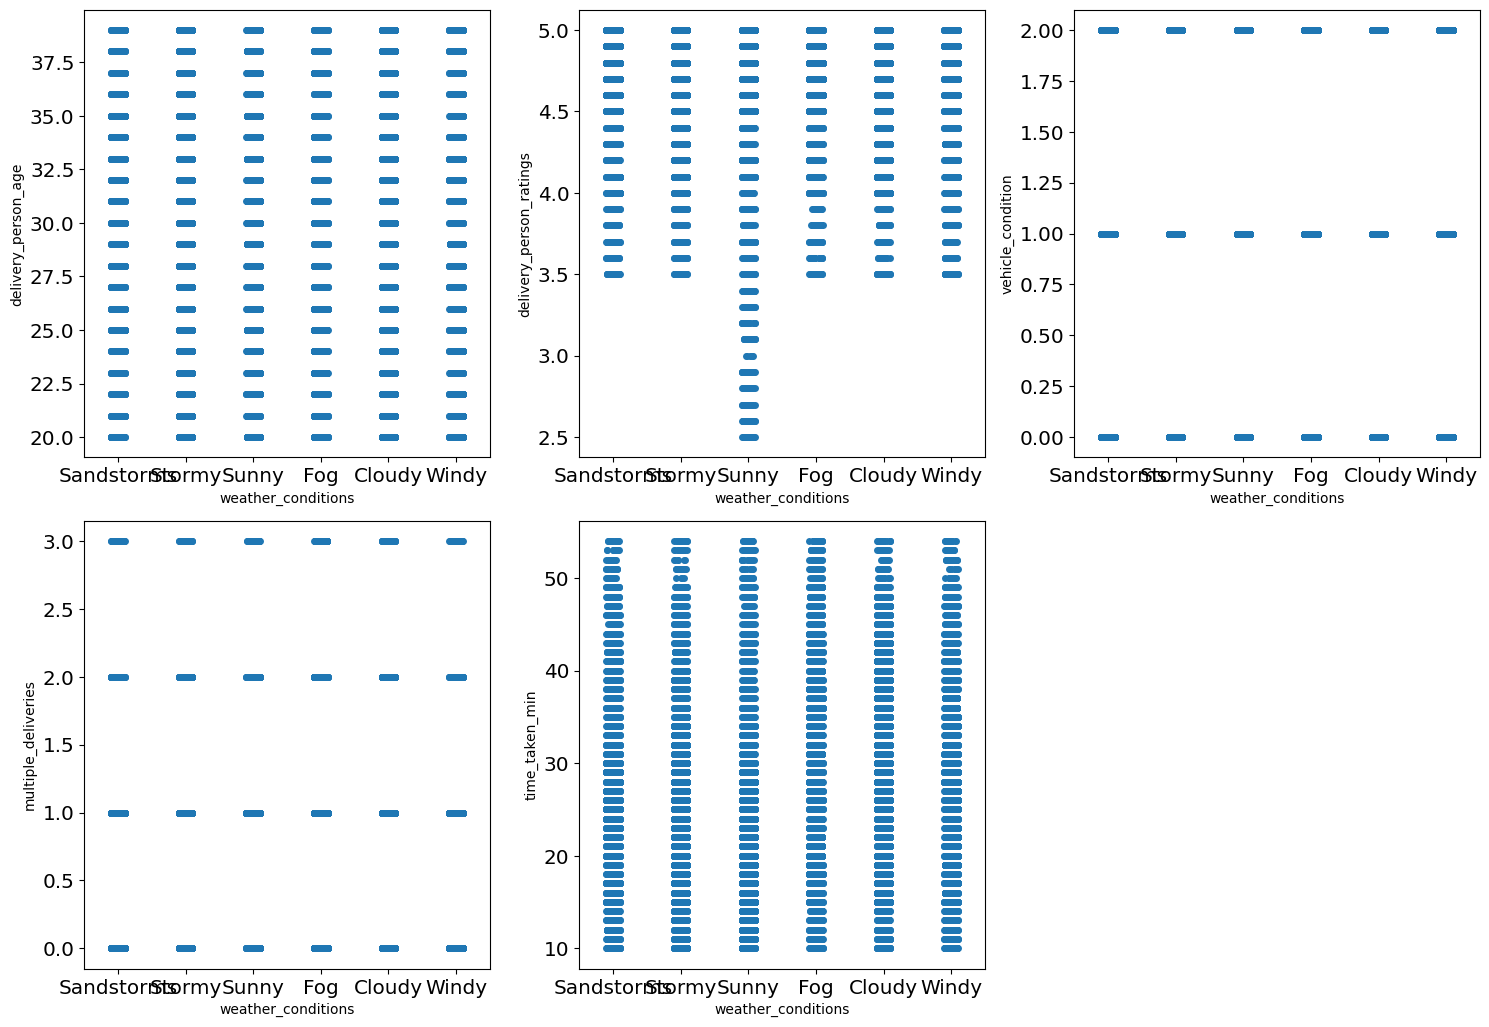

In [24]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='weather_conditions', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

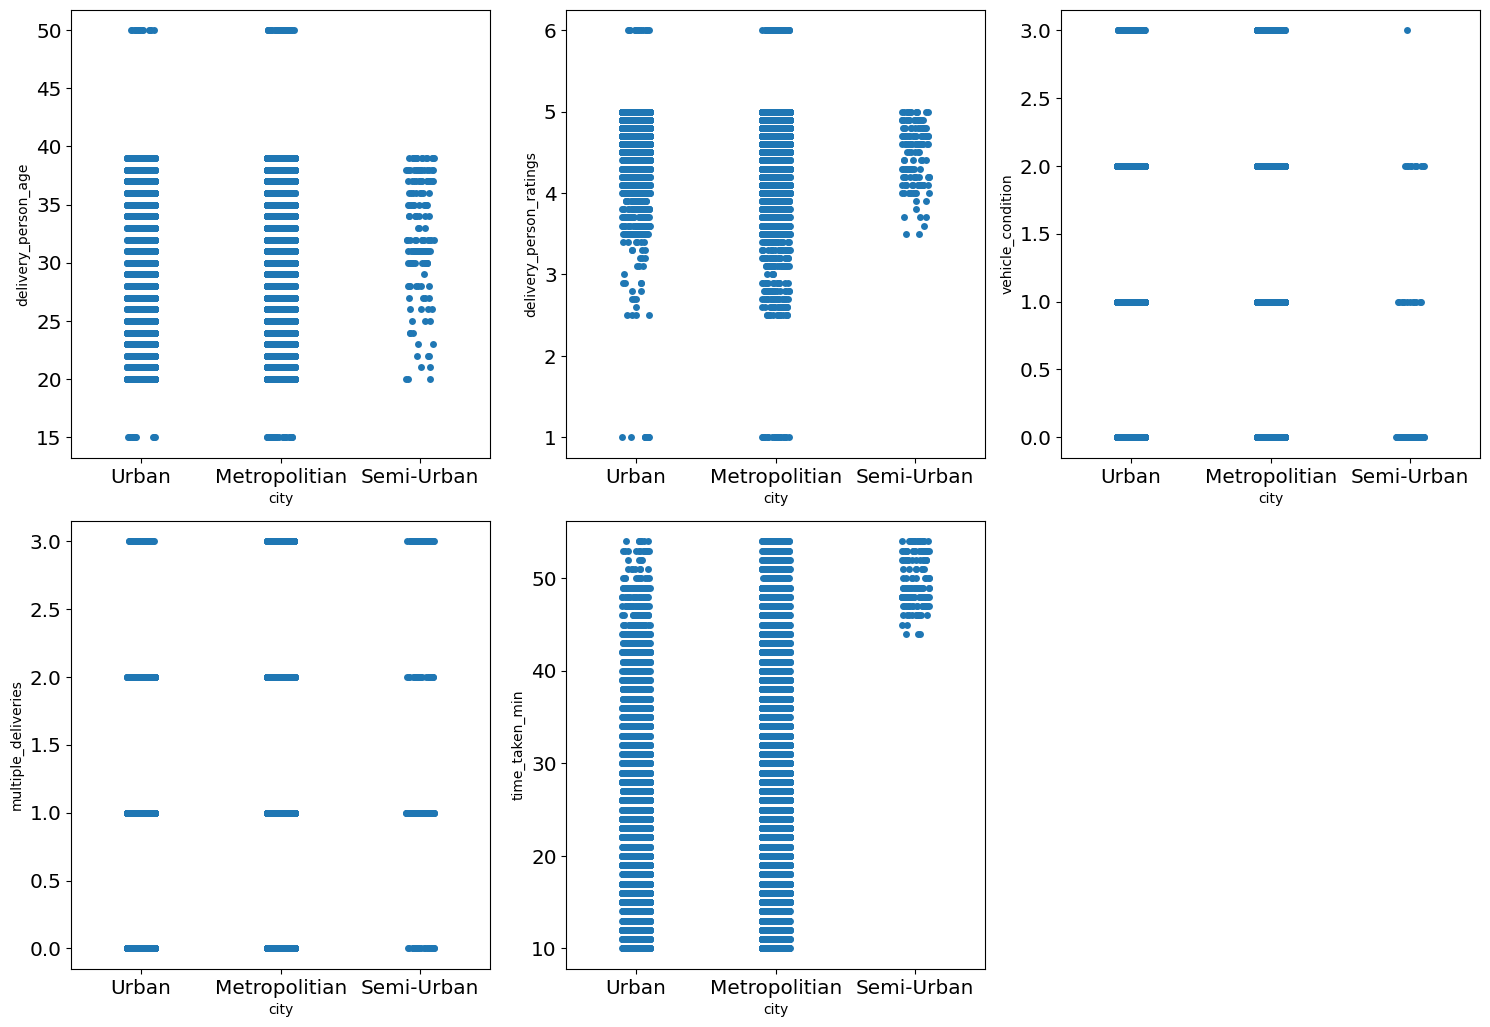

In [25]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='city', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

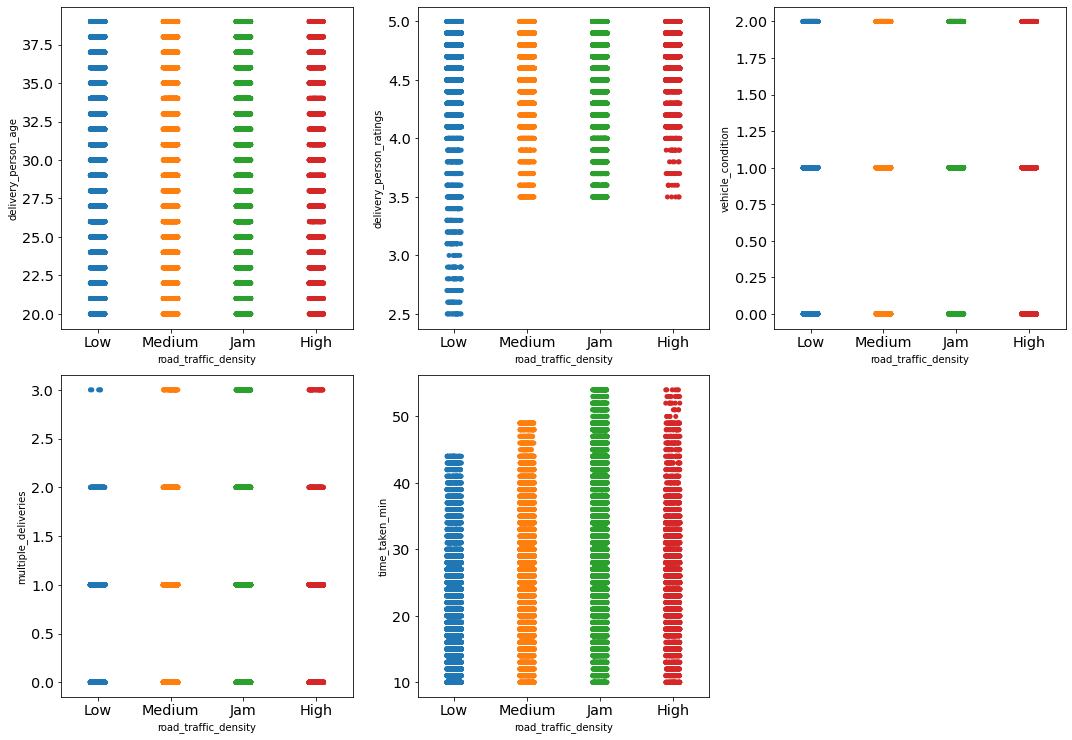

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='road_traffic_density', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

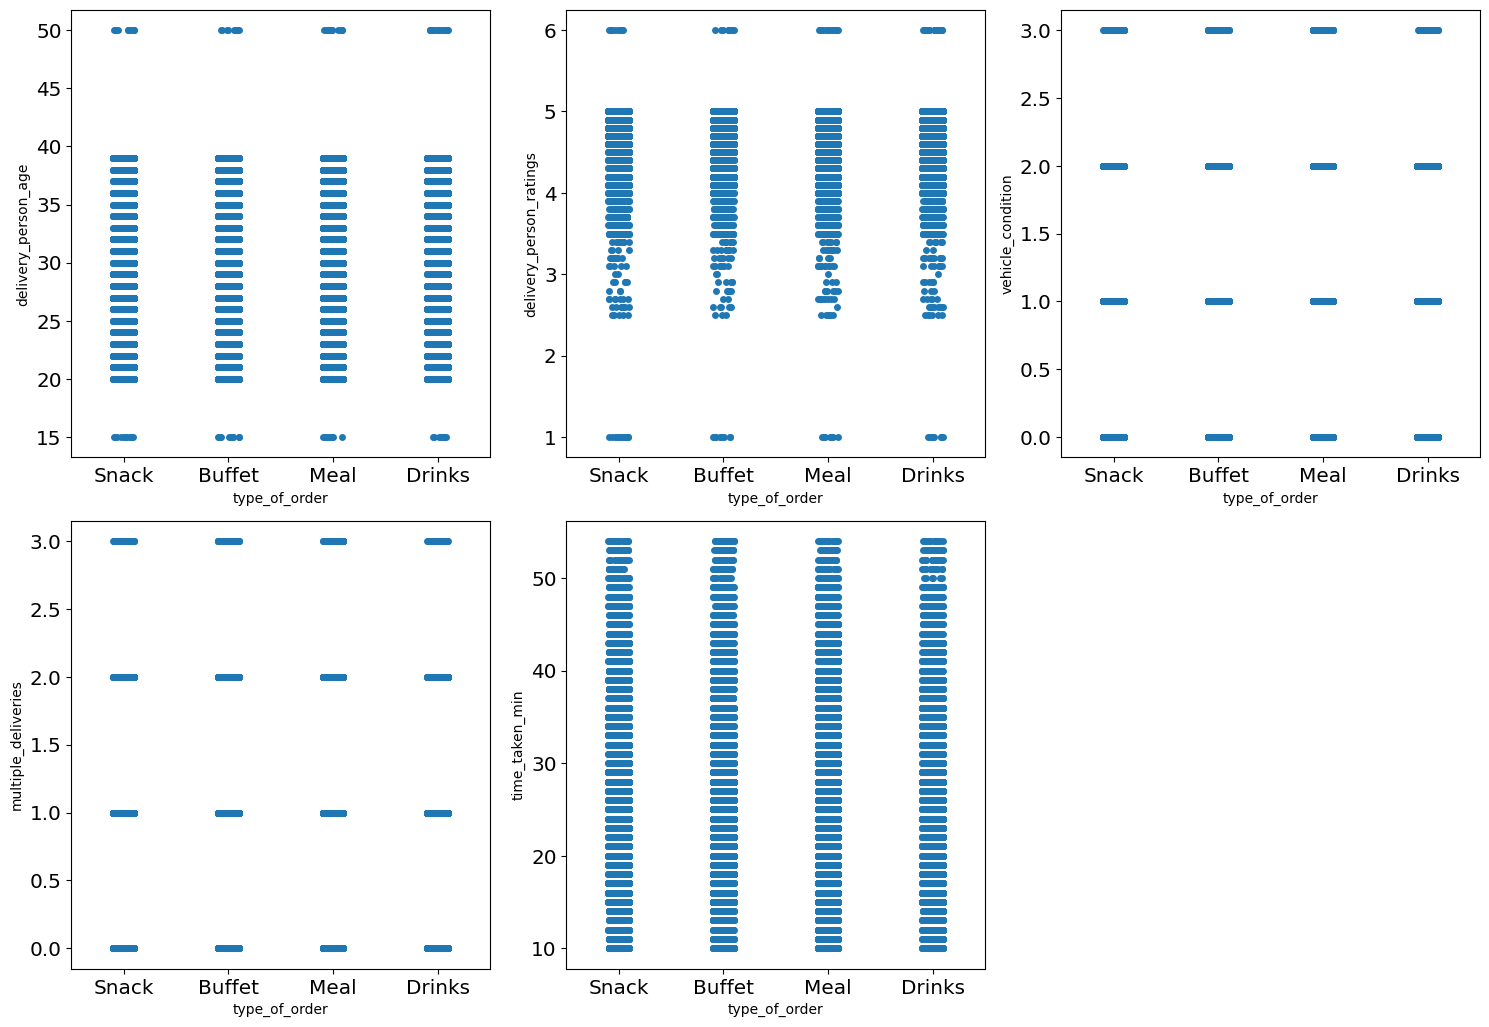

In [26]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='type_of_order', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

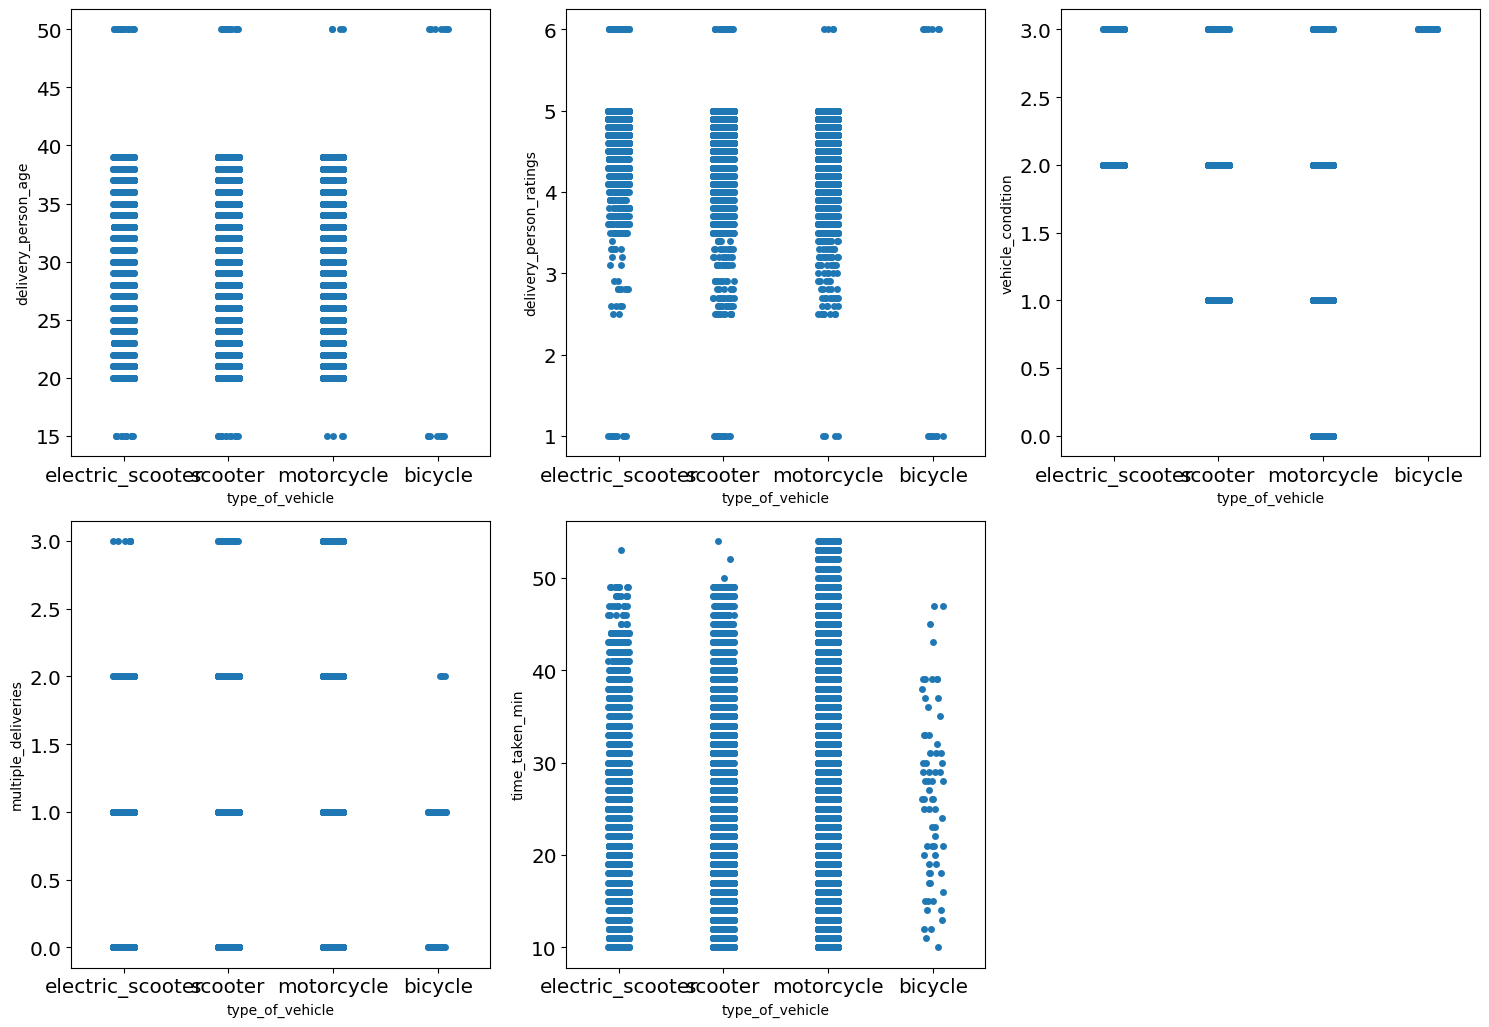

In [27]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='type_of_vehicle', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()